## Importing files using numpy's genfromtxt() and how to index and slice arrays

This week we'll learn how to import files which is very handy if you have large data sets.  It's even handy if you don't want have to type in all of your data by hand if you've done your data taking in a text file for example.
Once the data is imported into an array (generally a 2D array), we'll learn how to grab the data we want to assign to our x and y variables for plotting.

Everyone download and open up the PHSX218_Week1 Jupyter notebook from Moodle or a Google Colab so that you can be ready to do some array work here in a bit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Create a couple simple arrays
#1D array
arr1 = np.array([2,4,5,6,8])
#2D array
arr2 = np.array([[1,2],[2,3],[6,8],[7,9]])

#Draw on board to show 2D array and indices [row,col]

#Indexing starts at 0, so the first element in an array is the zeroth

print(arr1[0])
print(arr2[0])

2
[1 2]


Slicing means to grab portions of the array based on what you need.

1. a[start:stop]  # items start through stop-1
2. a[start:]      # items start through the rest of the array
3. a[:stop]       # items from the beginning through stop-1
4. a[:]           # a copy of the whole array


The key point to remember is that the :stop value represents the first value that is not in the selected slice. So, the difference between stop and start is the number of elements selected.

We will not be covering "advanced" slicing techniques

In [2]:
x = arr1[0:3]
print(x)
y = arr2[1:3]
print (y)

[2 4 5]
[[2 3]
 [6 8]]


In [3]:
#We don't have to use print statements or assign to variables if 
#we just want to look at some slices
arr2[1]

array([2, 3])

In [4]:
arr2[:3]

array([[1, 2],
       [2, 3],
       [6, 8]])

In a 2D array, the indices are [row,col]  Let's look at my drawing on the whiteboard.

So then if we want to grab the entire first column of data, we can do the following:

In [5]:
x = arr2[:,0] #: for all the rows, and 0 for the zeroth column only
print (x)

[1 2 6 7]


### Head to the breakout rooms for about 5 minutes to work on the following and then we'll come back 
1. With the 2D array, assign the first column of data to a variable x, and assign the second column of data to a variable y. Print out your results
2. With the 2D array, assign the first two rows of the first column of data to a variable z and print out result. (your result should be [1,2])

In [6]:
x = arr2[:,0]
print(x)
y = arr2[:,1]
print(y)

z = arr2[:2,0]
print(z)

[1 2 6 7]
[2 3 8 9]
[1 2]


#### Let's look at importing data files and doing some plotting and analysis.  To do this we'll use Numpy's genfromtxt function.  There are a lot of options available with genfromtxt as shown in the API (Application Progamming Interface) below, which can make it seem really confusing at first, so we're going to keep it simple!

numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')

Satellites in low Earth orbit (LEO) operate between 250 and 1500 km above the ground. Because Earth's atmosphere extends hundreds of miles into space, LEOs eventually experience enough friction that they fall back to Earth and burn up. The accompanying text files gives the number of low Earth orbit satellites that reentered the Earth's atmosphere and the number of sunspots for each year since 1969. Graph the number of reentered satellites vs. the number of sunspots. Source: NASA Goddard Space Flight Center.


Look first at satellite-failures.txt file.  

In [7]:
file = "satellite-failures.txt"
data = np.genfromtxt(file,skip_header=1,usecols=(1,2))
print(data)

[[105.  26.]
 [107.  25.]
 [ 66.  19.]
 [ 67.  12.]
 [ 37.  14.]
 [ 32.  21.]
 [ 14.  15.]
 [ 12.  16.]
 [ 26.  18.]
 [ 87.  33.]
 [145.  42.]
 [149.  41.]
 [146.  32.]
 [115.  19.]
 [ 65.  28.]
 [ 43.  14.]
 [ 16.  17.]
 [ 11.  16.]
 [ 29.  13.]
 [101.  33.]
 [162.  45.]
 [145.  30.]
 [144.  40.]
 [ 93.  41.]
 [ 54.  28.]
 [ 31.  17.]
 [ 18.  20.]
 [  8.  22.]
 [ 20.  21.]
 [ 62.  30.]
 [ 96.  25.]
 [124.  37.]
 [123.  41.]
 [109.  38.]
 [ 66.  31.]
 [ 43.  19.]]


In [8]:
# how big is the array?  (rows,cols) will be returned
print (data.shape)

#I want to select every row (:), but only those
#whose second index is 0. This gives us the first column
sunspots = data[:,0]

#I want to select every row, but only the second thing in each
#row, giving us our satellites data
satellites = data[:,1]

#print (sunspots)
#print (satellites)



(36, 2)


13.952004077267041 0.1635072456826606


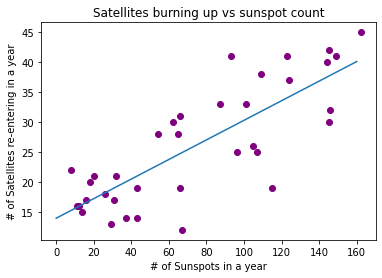

In [9]:
intercept, slope = np.polynomial.polynomial.polyfit(sunspots,satellites,1)

print(intercept,slope)

#create best fit line's x and y points
x = np.linspace(0,160)

#best fit line
y = slope*x + intercept

plt.xlabel("# of Sunspots in a year")
plt.ylabel("# of Satellites re-entering in a year")
plt.title("Satellites burning up vs sunspot count")
plt.scatter(sunspots,satellites,color="purple")
plt.plot(x,y)

### Predict how many satellites would burn up if there were 400 sunspots in a year.

In [10]:
print((slope*400) + intercept)

79.35490235033129


### Lab Assignment
Mauna Loa Observatory on the "Big Island" of Hawaii has been recording atmospheric carbon dioxide concentrations for nearly half a century beginning in the year 1958. Readings are taken continuously, but only the monthly averages are reported. Values are reported in parts per million (ppm) Construct a graph of atmospheric CO2 concentration vs. time. What two obvious behaviors are revealed in your graph? Split the data set in half, make two plots and perform a linear regression analysis on the data for the years… 1958-1987 and 1988-2017. Compare the behavior of CO2 levels in the first half of the data set to the second half. If the rate of CO2 concentration(ppm)/year continues as it has in the 1988-2017 range, what would the CO2 concentration(ppm) be in 2040?

Source: Scripps Institution of Oceanography

Use the co2-mauna-loa.txt file from Moodle.

For the Moodle quiz, there are a few questions related to the review topics, and then you'll submit a github link for your notebook. 

359
-1994.7067419257235  slope: 1.178139128030591


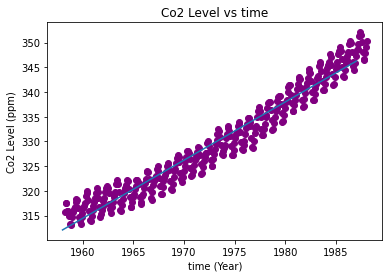

In [11]:
file = "co2-mauna-loa.txt"
data = np.genfromtxt(file,skip_header=2,usecols=(0,1))

year = data[:359,0]
level = data[:359,1]
print(len(year))
intercept, slope = np.polynomial.polynomial.polyfit(year,level,1)

print(intercept," slope:",slope)


#create best fit line's x and y points
x = np.linspace(1958,1987)

#best fit line
y = slope*x + intercept

plt.xlabel("time (Year)")
plt.ylabel("Co2 Level (ppm)")
plt.title("Co2 Level vs time")
plt.scatter(year,level,color="purple")
plt.plot(x,y)

359
-3423.790189662395  slope: 1.897000853524771


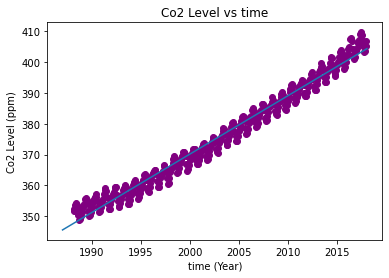

In [12]:
year = data[359:,0]
level = data[359:,1]
print(len(year))
intercept, slope = np.polynomial.polynomial.polyfit(year,level,1)

print(intercept," slope:",slope)


#create best fit line's x and y points
x = np.linspace(1987,2018)

#best fit line
y = slope*x + intercept

plt.xlabel("time (Year)")
plt.ylabel("Co2 Level (ppm)")
plt.title("Co2 Level vs time")
plt.scatter(year,level,color="purple")
plt.plot(x,y)

In [13]:
pred = (slope * 2040) + intercept
print("Predicted 2040 Co2 level: {:.8} ppm".format(pred))

Predicted 2040 Co2 level: 446.09155 ppm
